In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

#  Data Collection

In [2]:
salary = pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
x = salary['YearsExperience']
y = salary['Salary']

# Data Understanding

In [3]:
salary.shape

(30, 2)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Assumption Checks

## Test fro linearity

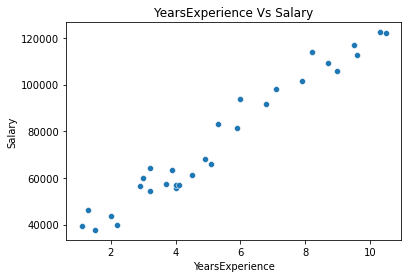

In [14]:
sns.scatterplot(x =x,y = y, data= salary)
plt.title('YearsExperience Vs Salary')
plt.show()

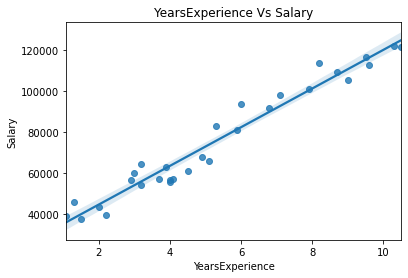

In [17]:
sns.regplot(x =x,y = y, data= salary)
plt.title('YearsExperience Vs Salary')
plt.show()

# Test For Normailty

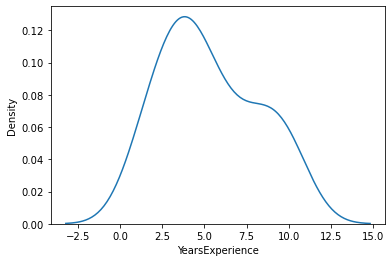

In [18]:
sns.distplot(a= x,hist= False)
plt.show()

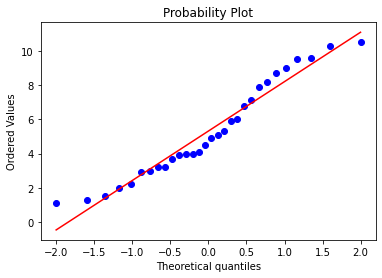

In [19]:
stats.probplot(x= x,dist= 'norm',plot= plt)
plt.show()

# Model Buildng | Model Training

In [50]:
import statsmodels.formula.api as smf
model = smf.ols('y~x',data=salary).fit()

In [51]:
model.rsquared

0.9569566641435086

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        00:43:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [46]:
y_pred = model.predict(salary)

In [40]:
 = model.resid

In [43]:
error = model.resid_pearson

# Model transformation

In [30]:
import statsmodels.formula.api as smf
model2 = smf.ols('np.log(y)~np.sqrt(x)',data=salary).fit()

In [31]:
model.rsquared

0.9433627863225935

In [32]:
model3 = smf.ols('np.log(y)~x',data=salary).fit()

In [33]:
model3.rsquared

0.9319671194084195

In [36]:
model4 = smf.ols('y~np.log(x)',data=salary).fit()

In [37]:
model4.rsquared

0.8538888828756969

# Model evaluation 

## Homoscadascity

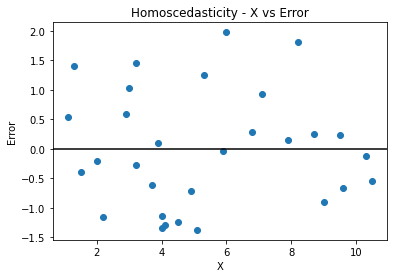

In [45]:
plt.scatter(x= x ,y = error)
plt.axhline(0,color = 'black')
plt.title('Homoscedasticity - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

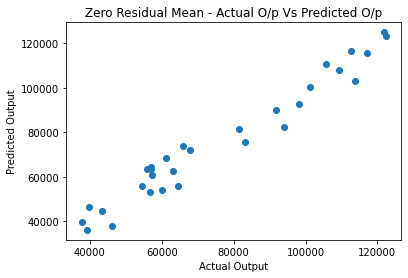

In [47]:
plt.scatter(x = y, y = y_pred)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

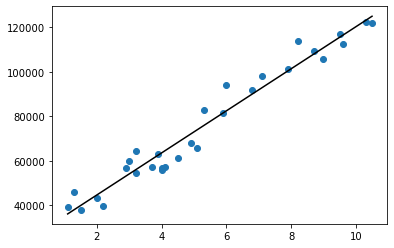

In [52]:
plt.scatter(x = x, y= y)
plt.plot(x,y_pred,color = 'Black')
plt.show()

# Model 1 is the best model